# Data Visualization

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

Prosper is a P2P lending platform that allows investors to choose among personal loans to invest in. They do that by considering a number of factors, which include a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors.

## Dataset Overview

Below will be a high-level overview of the dataset.

In [11]:
df = pd.read_csv('loanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


There are 113936 entries in this dataset.

## Univariate Exploration

I will start by looking at the main variable of interest: `BorrowerRate`. 

In [31]:
# Convert EmploymentStatus and IncomeRange to ordered categorical data type
var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
            'IncomeRange': ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed','$1-24,999','Not employed','$0'],
            'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']
           }

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [30]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Employment Status:
The employment status of the borrower at the time they posted the listing.

The plot shows that it is rare that unemployed individual can obtain a loan from Prosper.

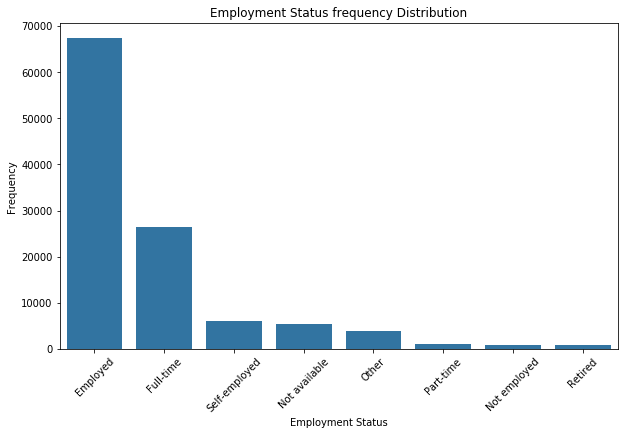

In [49]:
colorChoice = sb.color_palette()[0]

plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'EmploymentStatus', color = colorChoice);
plt.title('Employment Status frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

### Income Range:
The income range of the borrower at the time the listing was created.

The plot shows that most individual who has a loan has an income range from 25k to 75k.

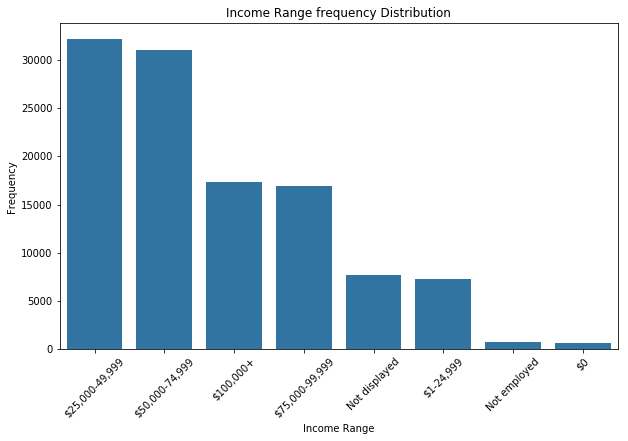

In [48]:
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'IncomeRange', color = colorChoice);
plt.title('Income Range frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Income Range');
plt.xticks(rotation=45);

### Loan Status:
The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

The plot shows that more than 50,000 individuals has a loan with Prosper.

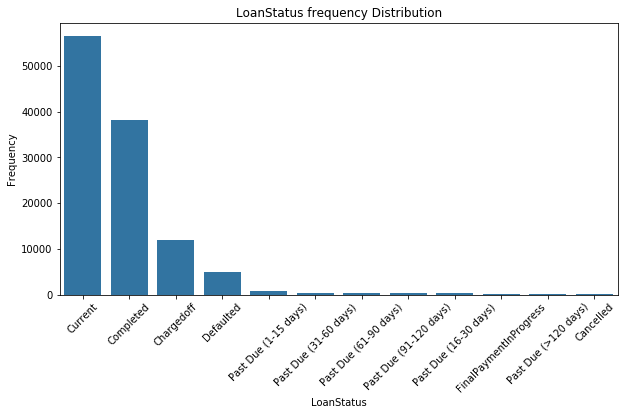

In [54]:
plt.figure(figsize=[10, 5]);
sb.countplot(data = df, x = 'LoanStatus', color = colorChoice);
plt.title('LoanStatus frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('LoanStatus');
plt.xticks(rotation=45);

### Prosper Score:
A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

The plot looks not to be skewed in any direction. 


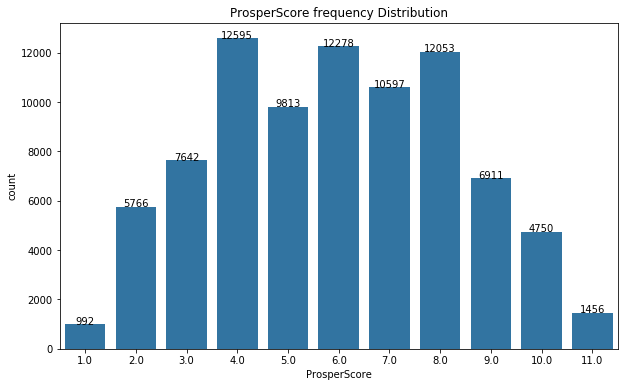

In [142]:
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'ProsperScore', color = colorChoice);
plt.title('ProsperScore frequency Distribution');

locs, labels = plt.xticks()
cat_counts = df['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

### Borrower APR:
The Borrower's Annual Percentage Rate (APR) for the loan.

### BorrowerRate:
The Borrower's interest rate for this loan. 



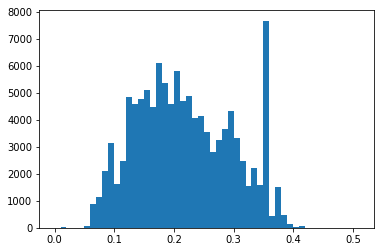

In [154]:
plt.figure(figsize=[10, 6]);

b = np.arange(0,df['BorrowerAPR'].value_counts().index.max(),0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = b);

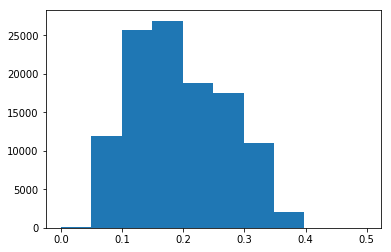

In [145]:
plt.hist(data = df, x = 'BorrowerRate');

## Bivariate Exploration

Now, I will investigate relationships between a pair of variables, especially how each of the variables relate to Borrower's rate.

Variables - The number of days delinquent, OnTimeProsperPayments, LoanOriginalAmount.

First I will create a plot of the borrower rate against The number of days delinquent.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


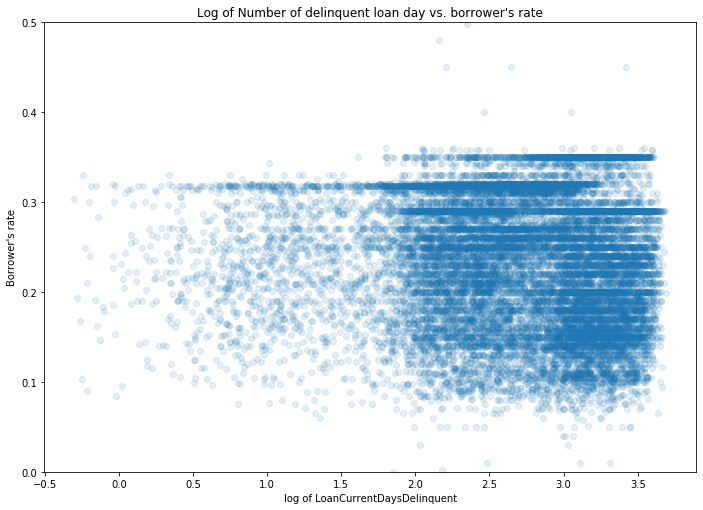

In [26]:
# bivariate plot of loan current days delinquent vs. borrower's rate
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
plt.figure(figsize=[ 11.69, 8.27]);

loan_df['log_LoanCurrentDaysDelinquent'] = loan_df.LoanCurrentDaysDelinquent.apply(log_trans)
    
sb.regplot(loan_df.LoanCurrentDaysDelinquent.apply(log_trans), loan_df.BorrowerRate, x_jitter = 0.3, scatter_kws = {'alpha' : 1/8});
plt.title('Log of Number of delinquent loan day vs. borrower\'s rate');
plt.xlabel('log of LoanCurrentDaysDelinquent');
plt.ylabel('Borrower\'s rate');
plt.ylim(0,0.5);

It is a surprise to see how many have loan delinquent for more than 1 day. However, it does not appear than it has significant enough impact on the borrower's rate.

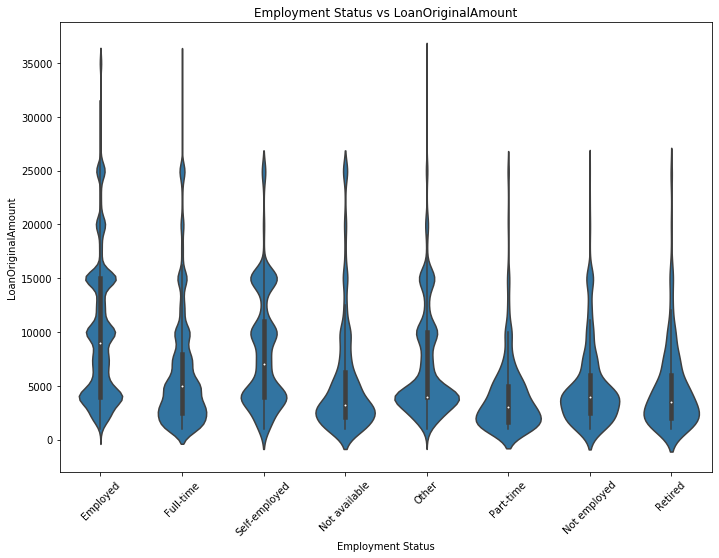

In [16]:
# bivariate plots of borrower's rate vs employment status
plt.figure(figsize=[ 11.69, 8.27]);
colorChoice = sb.color_palette()[0]

sb.violinplot(data = loan_df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color=colorChoice);
plt.title('Employment Status vs LoanOriginalAmount');
plt.ylabel('LoanOriginalAmount');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

It is interesting to see that employed and full time employed individuals have highest top loan amount. The median of employed category is the highest as well.

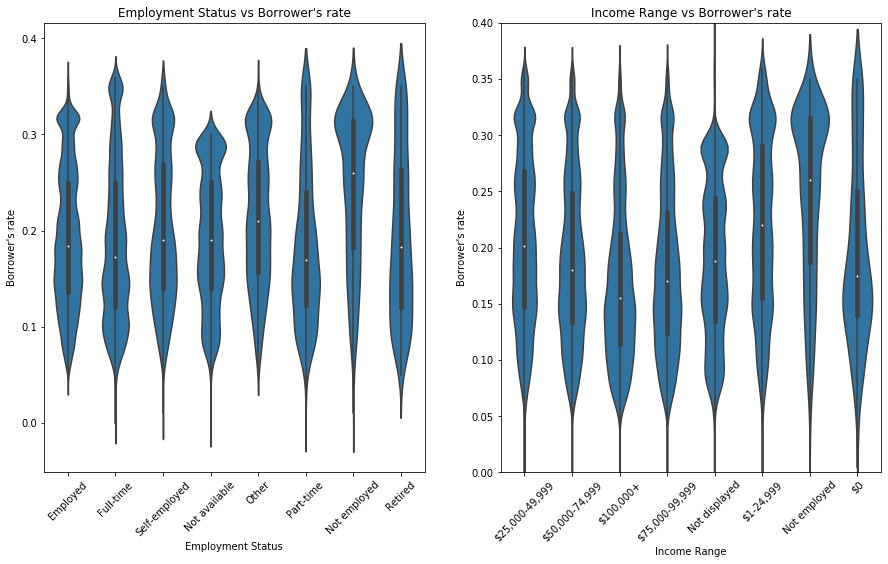

In [19]:
# bivariate plots of total loan amount vs employment status and income range
plt.figure(figsize=[15, 8.27]);
colorChoice = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.violinplot(data = loan_df, x = 'EmploymentStatus', y = 'BorrowerRate', color=colorChoice);
plt.title('Employment Status vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sb.violinplot(data = loan_df, x = 'IncomeRange', y = 'BorrowerRate', color=colorChoice);
plt.title('Income Range vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Income Range');
plt.xticks(rotation=45);
plt.ylim(0,0.4);

It is interesting to see that the median borrower's rate is higher when employment status is not-employed, and higher frequency with borrowing higher rate for the not-employed category. 
Looking at the income range plot, i see a trend that median rate is lower when income is at the higher end. 

## Multivariate Exploration

I will create a plot of the relationship between borrower's rate, is the individual homeowner, and number of delinquent day. 

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 841.68x595.44 with 0 Axes>

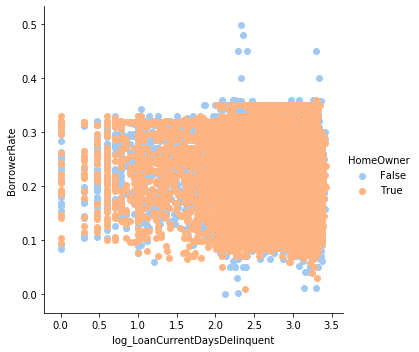

In [27]:
plt.figure(figsize=[ 11.69, 8.27]);
g = sb.FacetGrid(data = loan_df, hue = 'IsBorrowerHomeowner', size = 5,palette = 'pastel');
g.map(plt.scatter, 'log_LoanCurrentDaysDelinquent', 'BorrowerRate');
g.add_legend(title = 'HomeOwner');

It is unfortunate that I cannot see any trend because it is interest to see that the outliners with extremely high borrower's rate are not home owner.